In [5]:
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import cartopy.feature as cfeat
import cartopy.crs as ccrs
import seaborn as sns
%matplotlib inline

In [7]:
ds = xr.open_mfdataset("/home/satyam/Documents/Thesis_Work/Data1/precip.mon.mean.nc")
# It required as pandas dataframe
df = ds.to_dataframe().reset_index()
df = df[(df["time"] >= pd.to_datetime("1993-01-01")) & (df["time"] < pd.to_datetime("2002-12-31"))]
precip = df[(df["lon"] > 30) & (df["lon"] < 120) & (df["lat"] > 0) & (df["lat"] < 45)]
print(precip)

           lat     lon  nv       time  time_bnds  lat_bnds  lon_bnds    precip
5175384   1.25   31.25   0 1993-01-01 1993-01-01       0.0      30.0  1.921471
5175385   1.25   31.25   0 1993-02-01 1993-02-01       0.0      30.0  2.759369
5175386   1.25   31.25   0 1993-03-01 1993-03-01       0.0      30.0  3.329423
5175387   1.25   31.25   0 1993-04-01 1993-04-01       0.0      30.0  5.320088
5175388   1.25   31.25   0 1993-05-01 1993-05-01       0.0      30.0  6.852609
...        ...     ...  ..        ...        ...       ...       ...       ...
7649065  43.75  118.75   1 2002-08-01 2002-09-01      45.0     120.0  1.675602
7649066  43.75  118.75   1 2002-09-01 2002-10-01      45.0     120.0  0.333059
7649067  43.75  118.75   1 2002-10-01 2002-11-01      45.0     120.0  0.739434
7649068  43.75  118.75   1 2002-11-01 2002-12-01      45.0     120.0  0.067391
7649069  43.75  118.75   1 2002-12-01 2003-01-01      45.0     120.0  0.089280

[155520 rows x 8 columns]


In [21]:
x= precip.iloc[:,0:7]     # except precip columns , take other columns as independent variable
y = precip["precip"] #  considering precip column as dependent variable.


In [22]:
print(x)

           lat     lon  nv       time  time_bnds  lat_bnds  lon_bnds
5175384   1.25   31.25   0 1993-01-01 1993-01-01       0.0      30.0
5175385   1.25   31.25   0 1993-02-01 1993-02-01       0.0      30.0
5175386   1.25   31.25   0 1993-03-01 1993-03-01       0.0      30.0
5175387   1.25   31.25   0 1993-04-01 1993-04-01       0.0      30.0
5175388   1.25   31.25   0 1993-05-01 1993-05-01       0.0      30.0
...        ...     ...  ..        ...        ...       ...       ...
7649065  43.75  118.75   1 2002-08-01 2002-09-01      45.0     120.0
7649066  43.75  118.75   1 2002-09-01 2002-10-01      45.0     120.0
7649067  43.75  118.75   1 2002-10-01 2002-11-01      45.0     120.0
7649068  43.75  118.75   1 2002-11-01 2002-12-01      45.0     120.0
7649069  43.75  118.75   1 2002-12-01 2003-01-01      45.0     120.0

[155520 rows x 7 columns]


In [23]:
print(y)

5175384    1.921471
5175385    2.759369
5175386    3.329423
5175387    5.320088
5175388    6.852609
             ...   
7649065    1.675602
7649066    0.333059
7649067    0.739434
7649068    0.067391
7649069    0.089280
Name: precip, Length: 155520, dtype: float32


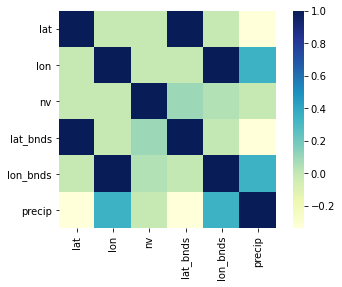

In [10]:
# code to plot correlation

#library to establish correlation
import seaborn as sns
names= []

# creating a correlation matrix
correlations = precip.corr()
sns.heatmap(correlations,square=True,cmap= "YlGnBu")
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()       # 1.0 value gives perfect positive correlation

In [29]:
precip.head()

,lat,lon,nv,time,time_bnds,lat_bnds,lon_bnds,precip
5175384,1.25,31.25,0,1993-01-01,1993-01-01,0.0,30.0,1.921471
5175385,1.25,31.25,0,1993-02-01,1993-02-01,0.0,30.0,2.759369
5175386,1.25,31.25,0,1993-03-01,1993-03-01,0.0,30.0,3.329423
5175387,1.25,31.25,0,1993-04-01,1993-04-01,0.0,30.0,5.320088
5175388,1.25,31.25,0,1993-05-01,1993-05-01,0.0,30.0,6.852609


In [30]:
# The precipitation value indicated by the variable 'precip' is our target variable
# and the remaining are the feature variables based on which we will predict the precipitation value.
precip1 = precip.iloc[:,0:7] 
precip1.head()     # We can see that the target value 'precip' is missing from the data

,lat,lon,nv,time,time_bnds,lat_bnds,lon_bnds
5175384,1.25,31.25,0,1993-01-01,1993-01-01,0.0,30.0
5175385,1.25,31.25,0,1993-02-01,1993-02-01,0.0,30.0
5175386,1.25,31.25,0,1993-03-01,1993-03-01,0.0,30.0
5175387,1.25,31.25,0,1993-04-01,1993-04-01,0.0,30.0
5175388,1.25,31.25,0,1993-05-01,1993-05-01,0.0,30.0


In [32]:
# Data Preprocessing
#  We count the number of missing values for each feature using isnull()
precip1.isnull().sum()

lat          0
lon          0
nv           0
time         0
time_bnds    0
lat_bnds     0
lon_bnds     0
dtype: int64

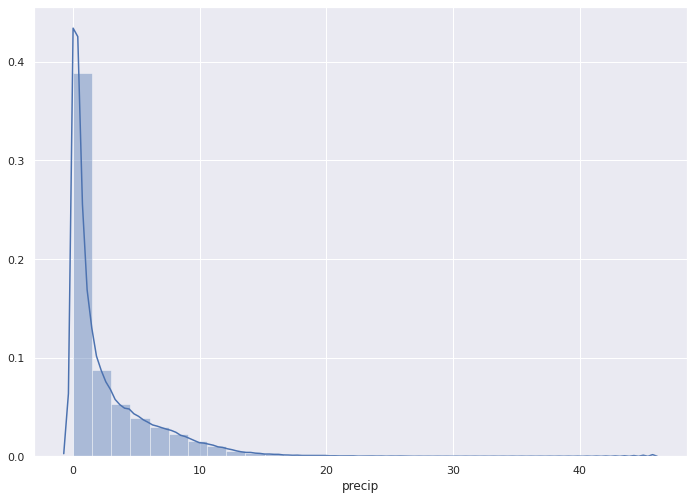

In [35]:
# Exploratory Data Analysis
# Exploratory Data Analysis is a very important step before training the model.
# we will use some visualizations to understand the relationship of the target variable with other features.
# plot the distribution of the target variable . We will use the distplot function from the seaborn library.

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(precip['precip'], bins=30)
plt.show()
# We see that the values of 'precip' are distributed with gamma distibution when alpha=3 and beta=0.5 with few outliers.

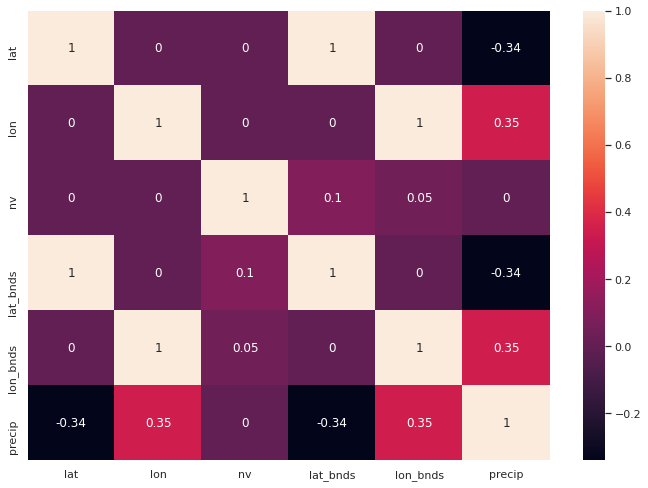

In [36]:
# we create a correlation matrix that measures the linear relationships between the variables.
# The correlation matrix can be formed by using the corr function from the pandas dataframe library.
# We will use the heatmap function from the seaborn library to plot the correlation matrix.
correlation_matrix = precip.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

# The correlation coefficient ranges from -1 to 1. If the value is close to 1, it means that there is a strong positive correlation between the two variables. 
# When it is close to -1, the variables have a strong negative correlation.

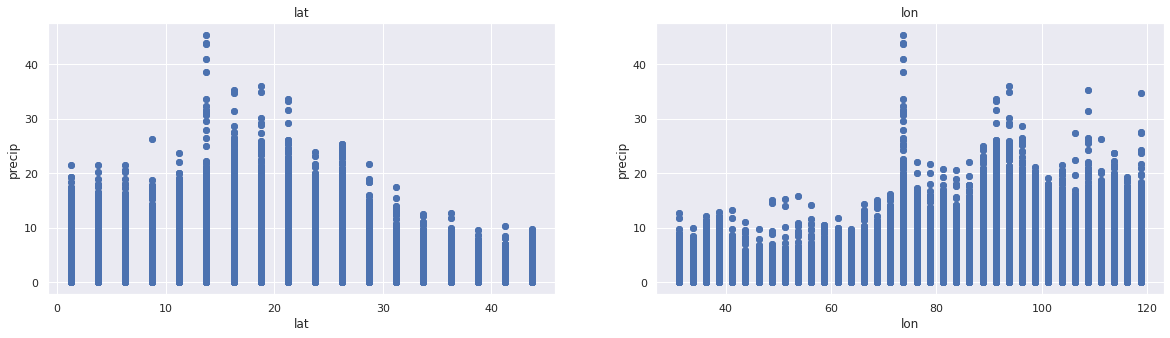

In [38]:
# To fit a linear regression model, we select those features which have a high correlation with our target variable 'precip'.
# By looking at the correlation matrix we can see that lon and lon_bnds have a high positive correlation with preip (0.35) where as lat and lat_bnds have a high negative correlation with precip(-0.34).

# Based on the above observations we will take lat and lon as our features. 
# Using a scatter plot let’s see how these features vary with precip.


plt.figure(figsize=(20, 5))

features = ['lat', 'lon']
target = precip['precip']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = precip1[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('precip')
    
# The precip first increase then approx. decreases as the value of lat increases. 
# Though it doesn't look to be following exactly linear line. 
# There are few outliers and the data seems to be capped at 40.
# The precip look like to increase with increase in lon but with the some variations. 
# Though it doesn’t look to be following exactly a linear line. 
# BUt

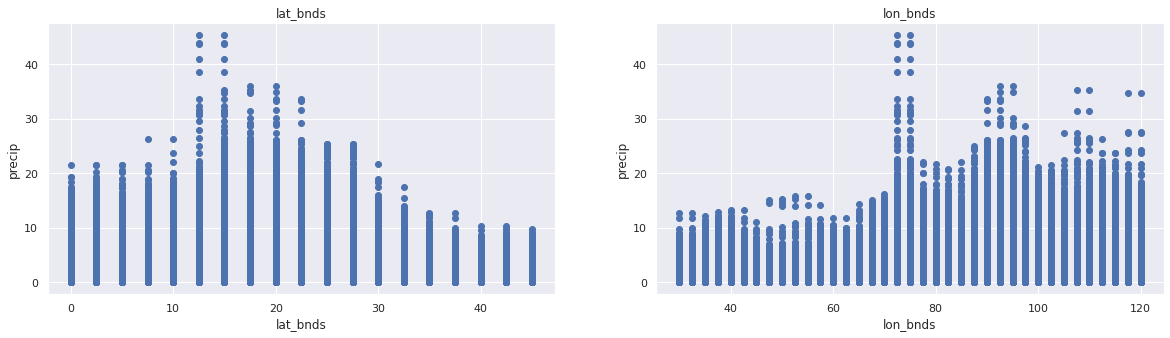

In [39]:
# Check similar works with lat_bnds and lon_bnds
plt.figure(figsize=(20, 5))

features = ['lat_bnds', 'lon_bnds']
target = precip['precip']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = precip1[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('precip')
    
# Getting approx. same type of scatter plot.

In [41]:
# Preparing the data for training the model
# We concatenate the lat and lon columns using np.c_ provided by the numpy library.
import numpy as np
X = pd.DataFrame(np.c_[precip1['lat'], precip1['lon']], columns = ['lat','lon'])
Y = precip['precip']

In [42]:
# Splitting the data into training and testing sets
# We train the model with 80% of the samples and test with the remaining 20%.
# To split the data we use train_test_split function provided by scikit-learn library.
# We finally print the sizes of our training and test set to verify if the splitting has occurred properly.
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(124416, 2)
(31104, 2)
(124416,)
(31104,)


In [43]:
# We use scikit-learn’s LinearRegression to train our model on both the training and test sets.
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [44]:
# model evaluation for training set
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))

from sklearn.metrics import r2_score
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

#=========================================================================================
# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 2.9883477066100737
R2 score is 0.23955239193428912


The model performance for testing set
--------------------------------------
RMSE is 3.029020522858691
R2 score is 0.23136884695257975


In [ ]:
#========================================================================================================
# R2 score means the proportion of the variance in the dependent variable that is predictable from the independent variable(s).
# according to Cohen (1992)  r-square value .12 or below indicate low, between .13 to .25 values indicate medium, .26 or above and above values indicate high effect size. 
# So, here it is medium.
# RMSE of test > RMSE of train => OVER FITTING of the data.
# There is no fixed threshold limit for RMSE and R squared. It is always better to have RMSE as low as possible.
# RMSE close to zero and R-Square approaching 1 are indicative of high accuracy between observed and predicted values